<a href="https://colab.research.google.com/github/geithelmasri/AAI614_Geith1/blob/main/Implementing_a_Simple_Diffusion_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 4 Hands_on Lab: Implementing a Simple Diffusion Model**

In this hands-on lab, we will write code to simulate the diffusion process.
By the end of this hands-on lab, you will:

* Understand the principles of forward and backward diffusion processes in image generation.
* Visualize the step-by-step progression of adding and removing noise in a diffusion model.
* Implement a basic diffusion process using Python and NumPy, building foundational knowledge for understanding real-world diffusion models.

# **Part 1: Simulate the Forward Diffusion Process**

1. **Import Needed Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt


2.	**Generate a Simple Image**

Create a 2D array to represent a basic image (e.g., a black-and-white gradient).


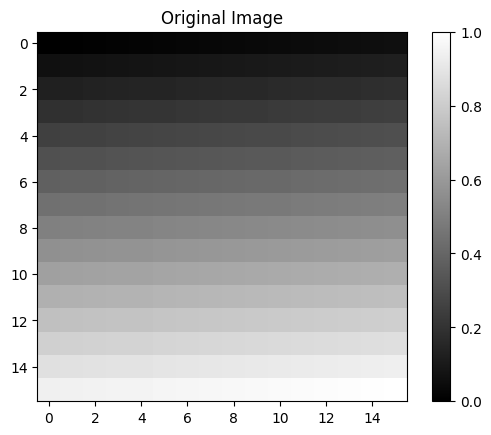

In [2]:
# Generate a simple "image" as a gradient
image = np.linspace(0, 1, 256).reshape(16, 16)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.colorbar()
plt.show()


3.	**Define the Forward Diffusion Process**

Add Gaussian noise to simulate the degradation of the image over time:


In [3]:
def forward_diffusion(image, num_steps, beta_start=0.01, beta_end=0.5):
    betas = np.linspace(beta_start, beta_end, num_steps)
    noisy_images = []
    for t, beta in enumerate(betas):
        noise = np.random.normal(0, np.sqrt(beta), image.shape)
        noisy_image = np.sqrt(1 - beta) * image + noise
        noisy_images.append(noisy_image)
    return noisy_images



**4. Visualize the Forward Process:**

Simulate the diffusion process and visualize intermediate steps:

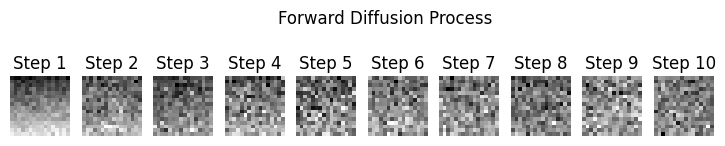

In [4]:
# Simulate forward diffusion
num_steps = 10
noisy_images = forward_diffusion(image, num_steps)

# Visualize the first 5 steps
plt.figure(figsize=(10, 2))
for i, step_image in enumerate(noisy_images[:]):
    plt.subplot(1, 11, i+1 )
    plt.imshow(step_image, cmap='gray')
    plt.title(f"Step {i+1}")
    plt.axis('off')
plt.suptitle("Forward Diffusion Process")
plt.show()


# **Part 2: Simulate the Backward Denoising Process**

1.	**Define the Reverse Denoising Process**

Implement a denoising function to reconstruct the original image:


In [5]:
def backward_denoising(noisy_images, num_steps, beta_start=0.01, beta_end=0.5):
    betas = np.linspace(beta_start, beta_end, num_steps)
    denoised_images = [noisy_images[-1]]  # Start with the most noisy image
    for t in reversed(range(num_steps)):
        beta = betas[t]
        noisy_image = denoised_images[-1]
        noise_estimate = noisy_image - np.sqrt(1 - beta) * image
        denoised_image = (noisy_image - noise_estimate * beta) / np.sqrt(1 - beta)
        denoised_images.append(denoised_image)
    return denoised_images[::-1]



**2. Visualize the Reverse Process:**

Observe how noise is removed step-by-step:

11


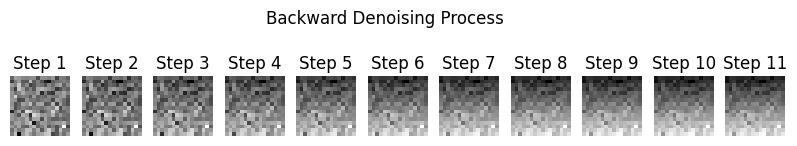

In [6]:
# Simulate backward denoising
denoised_images = backward_denoising(noisy_images, num_steps)

# Visualize the first 5 steps
plt.figure(figsize=(10, 2))
print(len(denoised_images))
for i, step_image in enumerate(denoised_images[::-1]):
    plt.subplot(1, 11, i+1 )
    plt.imshow(step_image, cmap='gray')
    plt.title(f"Step {i+1}")
    plt.axis('off')
plt.suptitle("Backward Denoising Process")
plt.show()


# **Part 3: Experimentation**


1.	**Test with Different Noise Levels**

Change beta_start and beta_end to observe their impact on the diffusion process.
2.	**Use a Real Image**

Replace the gradient image with a real grayscale image:


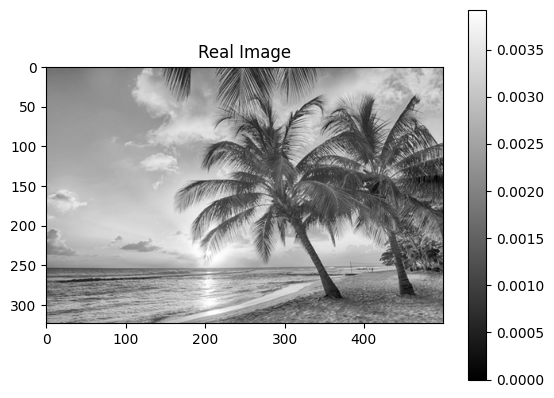

In [13]:
from skimage import io
image = io.imread("/content/grayscale-v1.png", as_gray=True) / 255.0  # Read and normalize
plt.imshow(image, cmap='gray')
plt.title("Real Image")
plt.colorbar()
plt.show()



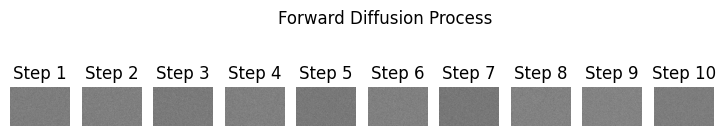

In [16]:
# Simulate forward diffusion
num_steps = 10
noisy_images = forward_diffusion(image, num_steps)

# Visualize the first 5 steps
plt.figure(figsize=(10, 2))
for i, step_image in enumerate(noisy_images[:]):
    plt.subplot(1, 11, i+1 )
    plt.imshow(step_image, cmap='gray')
    plt.title(f"Step {i+1}")
    plt.axis('off')
plt.suptitle("Forward Diffusion Process")
plt.show()

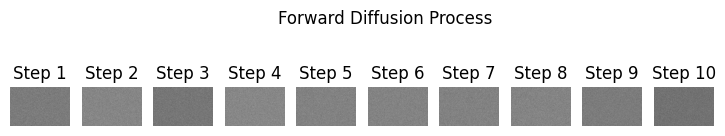

11


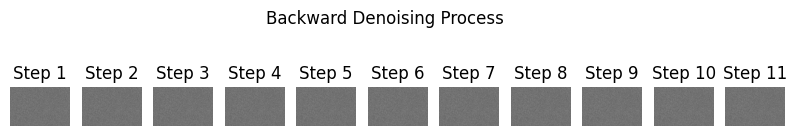

In [38]:

beta_start = 0.05 #@param {type:"slider", min:0.001, max:0.1, step:0.001}
beta_end = 0.07 #@param {type:"slider", min:0.001, max:0.1, step:0.001}

# ... (rest of your code remains the same)

def forward_diffusion(image, num_steps, beta_start=beta_start, beta_end=beta_end):
    betas = np.linspace(beta_start, beta_end, num_steps)
    noisy_images = []
    for t, beta in enumerate(betas):
        noise = np.random.normal(0, np.sqrt(beta), image.shape)
        noisy_image = np.sqrt(1 - beta) * image + noise
        noisy_images.append(noisy_image)
    return noisy_images

def backward_denoising(noisy_images, num_steps, beta_start=0.01, beta_end=0.5):
    betas = np.linspace(beta_start, beta_end, num_steps)
    denoised_images = [noisy_images[-1]]  # Start with the most noisy image
    for t in reversed(range(num_steps)):
        beta = betas[t]
        noisy_image = denoised_images[-1]
        noise_estimate = noisy_image - np.sqrt(1 - beta) * image
        denoised_image = (noisy_image - noise_estimate * beta) / np.sqrt(1 - beta)
        denoised_images.append(denoised_image)
    return denoised_images[::-1]

# ... (rest of your code remains the same)

num_steps = 10
noisy_images = forward_diffusion(image, num_steps)

# Visualize the first 5 steps
plt.figure(figsize=(10, 2))
for i, step_image in enumerate(noisy_images[:]):
    plt.subplot(1, 11, i+1 )
    plt.imshow(step_image, cmap='gray')
    plt.title(f"Step {i+1}")
    plt.axis('off')
plt.suptitle("Forward Diffusion Process")
plt.show()

denoised_images = backward_denoising(noisy_images, num_steps)

# Visualize the first 5 steps
plt.figure(figsize=(10, 2))
print(len(denoised_images))
for i, step_image in enumerate(denoised_images[::-1]):
    plt.subplot(1, 11, i+1 )
    plt.imshow(step_image, cmap='gray')
    plt.title(f"Step {i+1}")
    plt.axis('off')
plt.suptitle("Backward Denoising Process")
plt.show()


**3. Evaluate Reconstruction Quality:**

Compare the denoised image to the original image:

In [39]:
# Simulate forward diffusion with the new image's shape
noisy_images = forward_diffusion(image, num_steps)
# Now noisy_images and all derived images will have the shape of the loaded image

# Simulate backward denoising
denoised_images = backward_denoising(noisy_images, num_steps)

# Calculate reconstruction error
reconstruction_error = np.mean((image - denoised_images[-1])**2)
print(f"Reconstruction Error: {reconstruction_error:.4f}")

Reconstruction Error: 0.0698


In [14]:
# Calculate reconstruction error
reconstruction_error = np.mean((image - denoised_images[-1])**2)
print(f"Reconstruction Error: {reconstruction_error:.4f}")


ValueError: operands could not be broadcast together with shapes (323,500) (16,16) 

Congratulations! You have reached the end of this Lab!

This hands-on lab builds a strong foundation for understanding diffusion models in advanced image generation tasks.

# Reflection on Noise Levels and Image Quality

# The noise levels, controlled by beta_start and beta_end in the forward diffusion process, significantly affect both the appearance of the noisy images and the quality of the reconstructed image.

# Higher noise levels (larger beta values):
# - Result in noisier intermediate images during the forward diffusion process.  The image degrades more quickly to pure noise.
# - Can make the backward denoising process more challenging, potentially leading to a reconstructed image that is further from the original.  The model has more "noise" to remove, and the estimation becomes less accurate.
# - May introduce artifacts or blurriness in the reconstructed image.  The model can over-correct, especially at higher noise levels.

# Lower noise levels (smaller beta values):
# - Produce noisy images that are closer to the original image.  The degradation is more gradual.
# - Result in a denoising process that is more stable and can potentially reconstruct an image with higher fidelity.  The "noise" is easier to remove.
# - Can lead to a reconstructed image that is visually similar to the original, with a lower reconstruction error.

# Optimal noise levels depend on the specific image and the desired outcome.
# Experimenting with different beta values is crucial to find the balance between sufficient noise for the diffusion process and maintaining image quality during reconstruction.  Too little noise, and the diffusion may not properly mix the image features, whereas too much may result in excessive noise and consequently an inferior reconstructed image.
